discretization refers to the process of converting or partitioning continuous attributes, features or variables to discretized or nominal attributes/features/variables/intervals.

### import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

### load datasets

In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.loc[:, ["Survived", "Age", "Fare"]]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.dropna(inplace=True)

### splitting data into train and test set

In [5]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((571, 2), (143, 2))

### without using descritization(binning)

In [29]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.6293706293706294

In [31]:
#using cross validation
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6330985915492958

### using descritization

In [32]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [33]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [34]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [35]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  7.  , 16.  , 18.  , 21.  , 23.  , 25.  , 27.  , 29.  ,
              31.  , 34.  , 37.  , 41.  , 47.  , 53.  , 80.  ])             ],
      dtype=object)

In [36]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.2292,   7.7958,   7.925 ,   8.6625,  10.5   ,
               13.    ,  14.5   ,  20.25  ,  26.    ,  27.9   ,  32.5   ,
               50.4958,  71.2833, 110.8833, 512.3292])                   ],
      dtype=object)

In [37]:
trf.named_transformers_['first'].n_bins_

array([15])

In [38]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [39]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [40]:
output.head()

,age,age_trf,fare,fare_trf,age_labels,fare_labels
483,63.0,14.0,9.5875,4.0,"(53.0, 80.0]","(8.662, 10.5]"
775,18.0,3.0,7.7500,1.0,"(16.0, 18.0]","(7.229, 7.796]"
664,20.0,3.0,7.9250,3.0,"(18.0, 21.0]","(7.796, 7.925]"
313,28.0,7.0,7.8958,2.0,"(27.0, 29.0]","(7.796, 7.925]"
6,54.0,14.0,51.8625,12.0,"(53.0, 80.0]","(50.496, 71.283]"


In [41]:
#model training and predictions
clf = DecisionTreeClassifier()

clf.fit(X_train_trf, y_train)

y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test, y_pred2)

0.6713286713286714

In [43]:
#using cross validation
X_trf = trf.fit_transform(X)

np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6302816901408451

In [46]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")
    
    plt.show()

0.6359350547730829


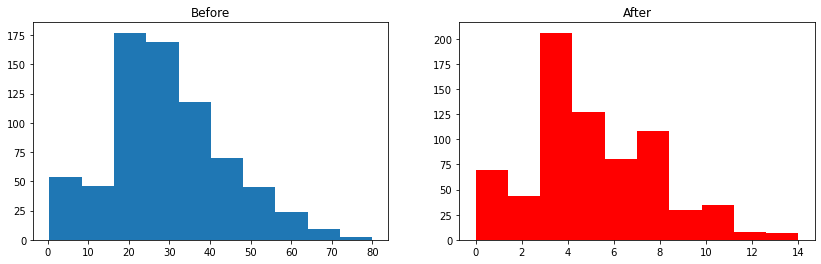

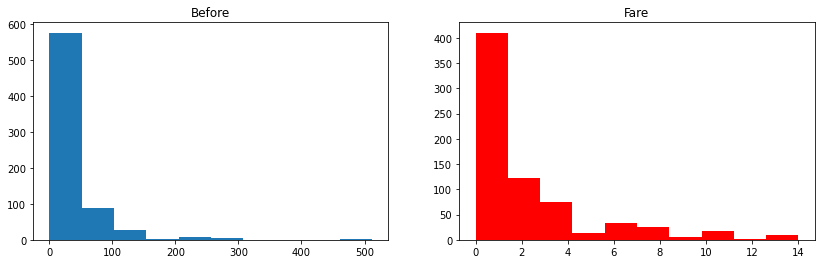

In [48]:
#kmeans 
discretize(15, 'kmeans')

0.6246870109546165


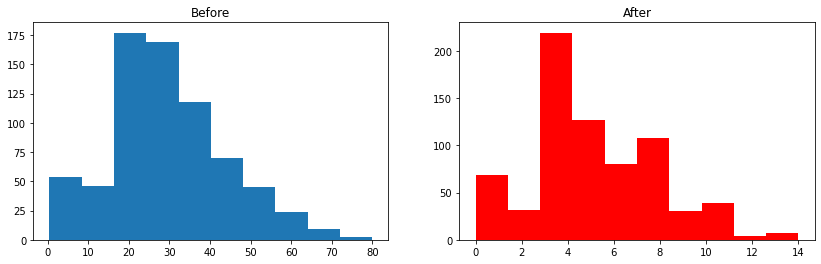

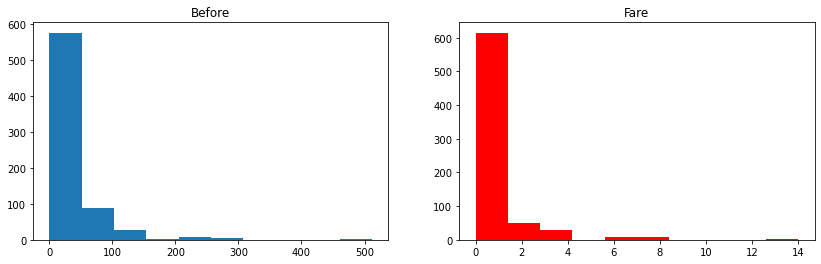

In [49]:
#uniform
discretize(15, 'uniform')

0.6317292644757433


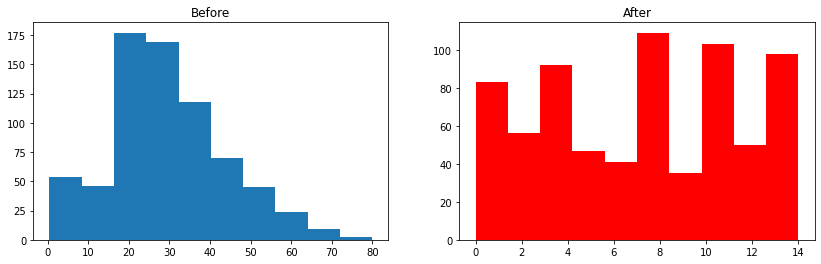

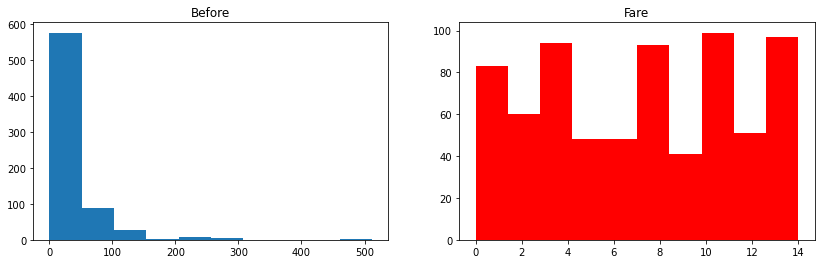

In [50]:
#quantile
discretize(15, 'quantile')